In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

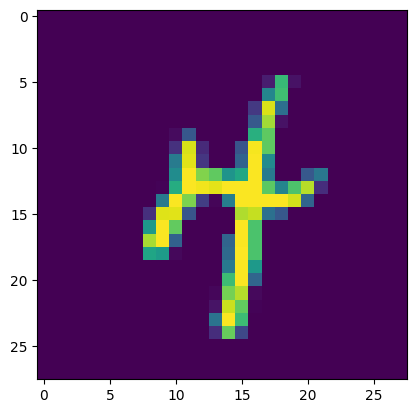

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[342])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\SIDDHARTH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs= 30, validation_split= 0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9985 - loss: 0.0050 - val_accuracy: 0.9772 - val_loss: 0.1408
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9766 - val_loss: 0.1497
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9772 - val_loss: 0.1486
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9978 - loss: 0.0063 - val_accuracy: 0.9763 - val_loss: 0.1515
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9988 - loss: 0.0029 - val_accuracy: 0.9761 - val_loss: 0.1583
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9988 - loss: 0.0033 - val_accuracy: 0.9787 - val_loss: 0.1472
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9779 - val_loss: 0.1654
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.9998 - los

In [27]:
y_probability = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


In [28]:
y_predicted  = y_probability.argmax(axis=1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.9799

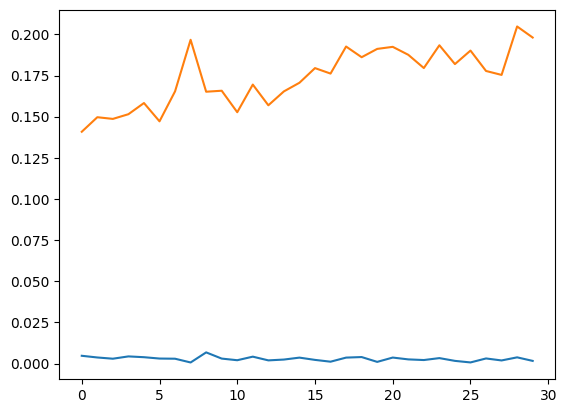

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

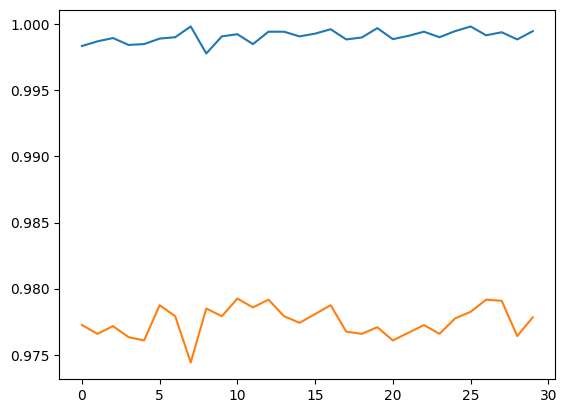

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])